<a href="https://colab.research.google.com/github/Harry-jain/AI_KA_HAI/blob/main/r_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# STEP 0: Download & unzip the Kaggle dataset via curl
# (make sure your Kaggle API credentials are set in ~/.kaggle/kaggle.json)
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

system("
  curl -L -o petrolgas-prices-worldwide.zip \\
    https://www.kaggle.com/api/v1/datasets/download/zusmani/petrolgas-prices-worldwide
")
unzip("petrolgas-prices-worldwide.zip", exdir = ".")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `daily_oil_consumption_barrels =
  as.numeric(daily_oil_consumption_barrels)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_col()`).”


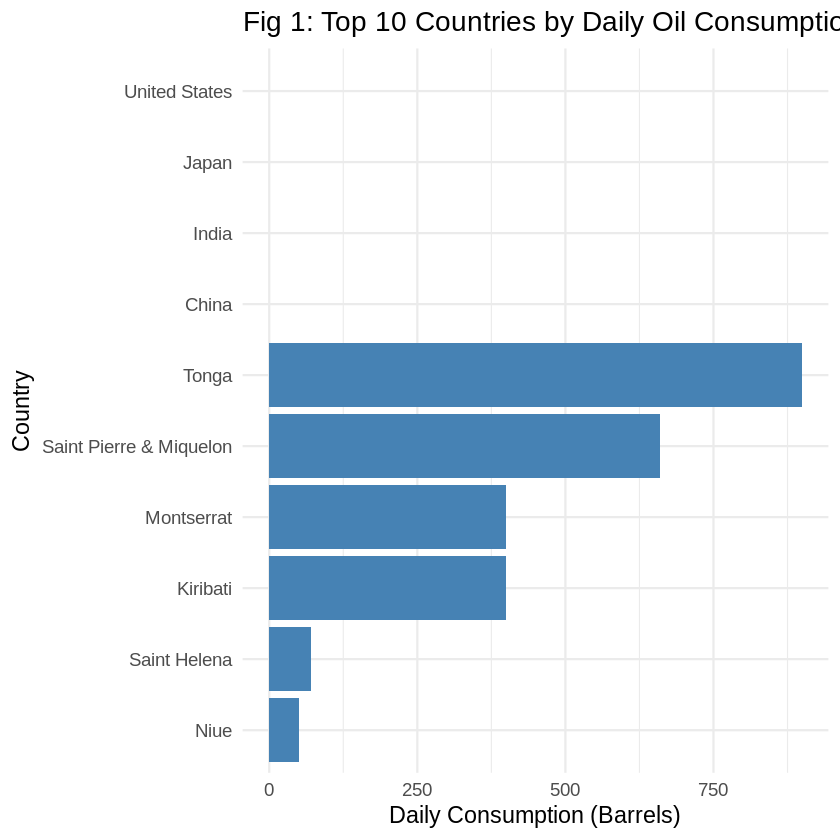

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 175 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 175 rows containing missing values or values outside the scale range
(`geom_point()`).”


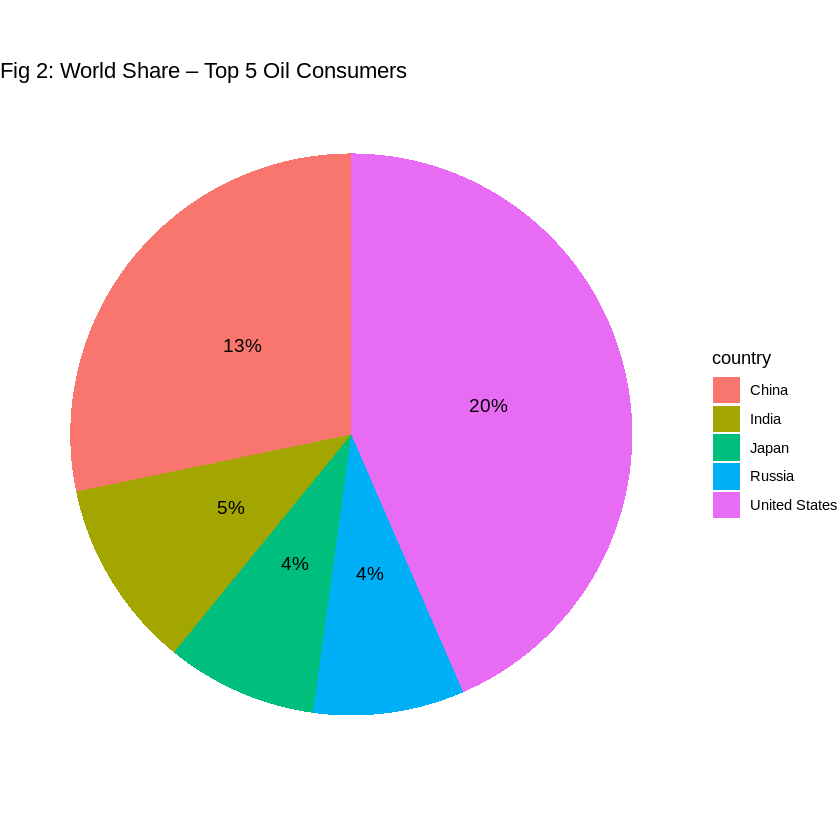

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 160 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation:
colour.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Removed 160 rows containing missing values or values outside the scale range
(`geom_point()`).”


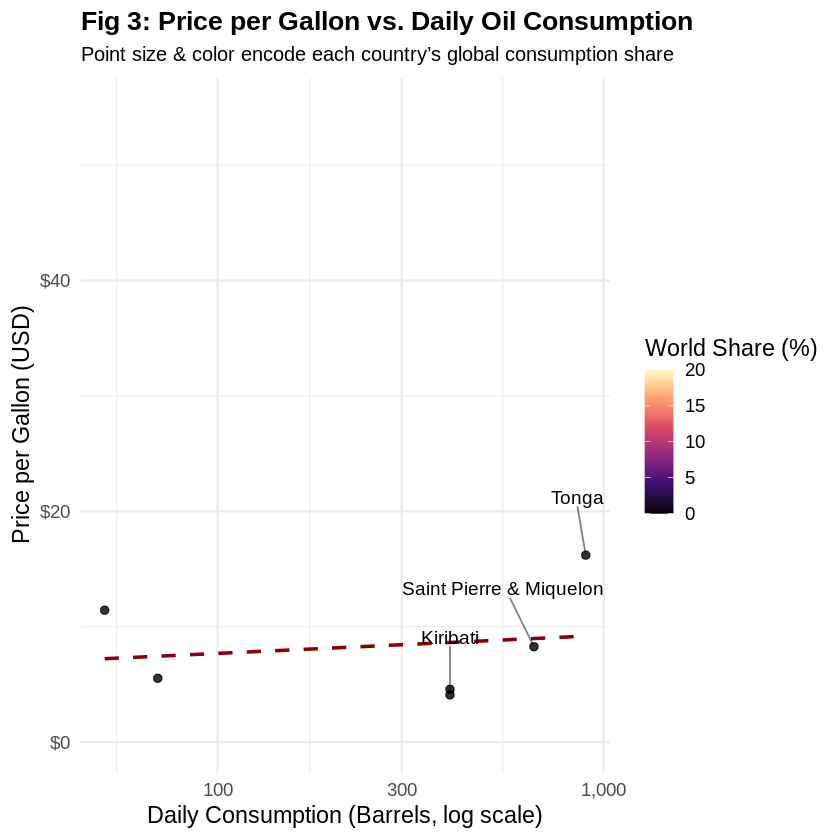

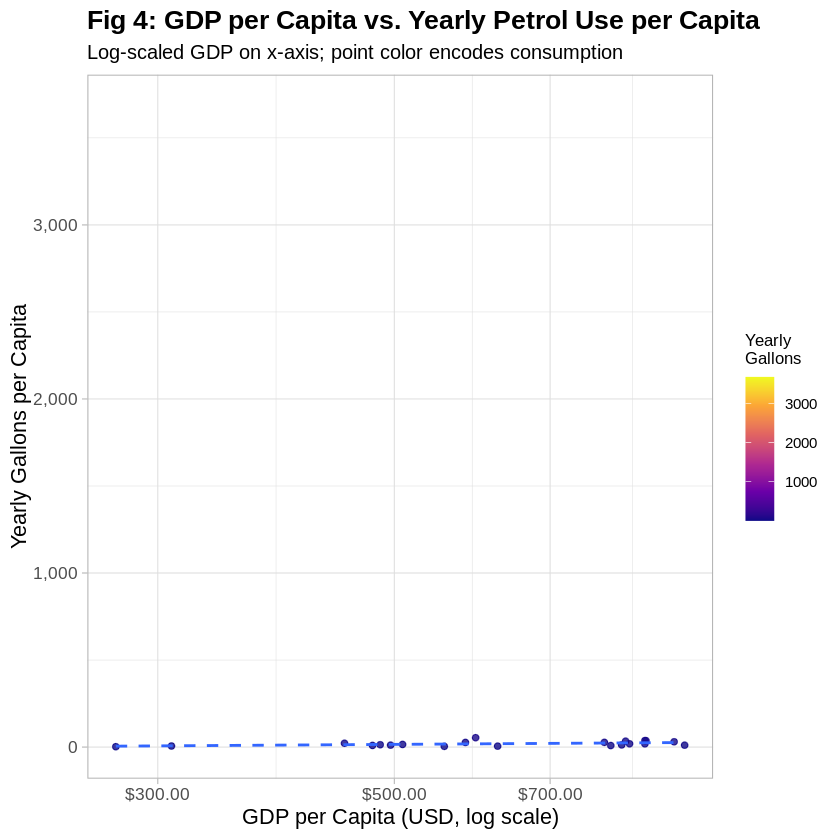

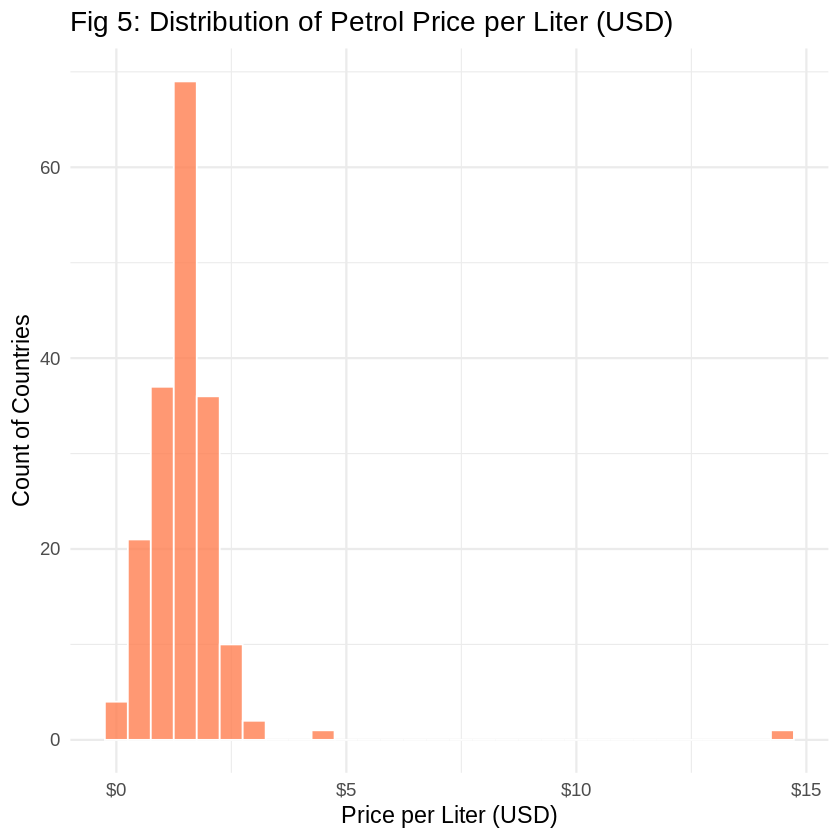

In [15]:
#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# 1) Install & load required packages
install.packages(
  c("ggplot2","dplyr","janitor","scales","ggrepel","viridis"),
  repos="https://cloud.r-project.org"
)
library(ggplot2); library(dplyr); library(janitor)
library(scales);  library(ggrepel);  library(viridis)

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# 2) Read & clean the data
df <- read.csv(
  "Petrol Dataset June 23 2022 -- Version 2.csv",
  stringsAsFactors = FALSE, encoding = "UTF-8"
) %>% clean_names()

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# 3) Coerce columns to numeric & strip "%" from world_share
df <- df %>%
  mutate(
    daily_oil_consumption_barrels = as.numeric(daily_oil_consumption_barrels),
    world_share                   = as.numeric(gsub("%","", world_share)),
    yearly_gallons_per_capita     = as.numeric(yearly_gallons_per_capita),
    price_per_gallon_usd          = as.numeric(price_per_gallon_usd),
    price_per_liter_usd           = as.numeric(price_per_liter_usd),
    gdp_per_capita_usd            = as.numeric(gdp_per_capita_usd)
  )

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Fig 1) Top 10 countries by daily oil consumption
top10 <- df %>%
  arrange(desc(daily_oil_consumption_barrels)) %>%
  slice_head(n = 10)

ggplot(top10, aes(
    x = reorder(country, daily_oil_consumption_barrels),
    y = daily_oil_consumption_barrels
  )) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Fig 1: Top 10 Countries by Daily Oil Consumption",
    x     = "Country",
    y     = "Daily Consumption (Barrels)"
  ) +
  theme_minimal(base_size = 14)

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Fig 2) Pie chart of world share for top 5 consumers
top5_share <- df %>%
  arrange(desc(world_share)) %>%
  slice_head(n = 5) %>%
  mutate(pct_label = paste0(round(world_share, 1), "%"))

ggplot(top5_share, aes(x = "", y = world_share, fill = country)) +
  geom_col(width = 1) +
  coord_polar(theta = "y") +
  geom_text(aes(label = pct_label),
            position = position_stack(vjust = 0.5),
            size = 4) +
  labs(title = "Fig 2: World Share – Top 5 Oil Consumers") +
  theme_void() +
  theme(legend.position = "right")

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Fig 3) Price per Gallon vs. Daily Oil Consumption (enhanced)
top3 <- df %>%
  arrange(desc(daily_oil_consumption_barrels)) %>%
  slice_head(n = 3)

ggplot(df, aes(
    x     = daily_oil_consumption_barrels,
    y     = price_per_gallon_usd,
    color = world_share,
    size  = world_share
  )) +
  geom_point(alpha = 0.8) +
  geom_smooth(
    method    = "lm",
    se        = FALSE,
    color     = "darkred",
    linetype  = "dashed",
    linewidth = 1
  ) +
  geom_text_repel(
    data       = top3,
    aes(label   = country),
    size       = 4,
    nudge_y    = 5,
    segment.alpha = 0.5
  ) +
  scale_x_log10(labels = comma) +
  scale_y_continuous(labels = dollar_format(prefix = "$")) +
  scale_color_viridis_c(option = "magma", name = "World Share (%)") +
  scale_size(range = c(2,6), guide = "none") +
  labs(
    title    = "Fig 3: Price per Gallon vs. Daily Oil Consumption",
    subtitle = "Point size & color encode each country’s global consumption share",
    x        = "Daily Consumption (Barrels, log scale)",
    y        = "Price per Gallon (USD)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    plot.title     = element_text(face = "bold", size = 16),
    plot.subtitle  = element_text(size = 12),
    legend.position = "right"
  )

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Fig 4) GDP per Capita vs. Yearly Petrol Use per Capita (enhanced)
ggplot(df, aes(
    x = gdp_per_capita_usd,
    y = yearly_gallons_per_capita,
    color = yearly_gallons_per_capita
  )) +
  geom_point(alpha = 0.8) +
  geom_smooth(
    method    = "lm",
    se        = FALSE,
    linetype  = "dashed",
    linewidth = 0.8
  ) +
  scale_x_log10(
    labels = dollar_format(prefix = "$", big.mark = ","),
    breaks = scales::log_breaks(n = 5)
  ) +
  scale_y_continuous(
    labels = comma,
    breaks = scales::breaks_pretty(n = 5)
  ) +
  scale_color_viridis_c(option = "plasma", name = "Yearly\nGallons") +
  labs(
    title    = "Fig 4: GDP per Capita vs. Yearly Petrol Use per Capita",
    subtitle = "Log-scaled GDP on x-axis; point color encodes consumption",
    x        = "GDP per Capita (USD, log scale)",
    y        = "Yearly Gallons per Capita"
  ) +
  theme_light(base_size = 13) +
  theme(
    plot.title     = element_text(face = "bold", size = 16),
    plot.subtitle  = element_text(size = 12),
    legend.title   = element_text(size = 10),
    legend.text    = element_text(size = 9)
  )

#––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
# Fig 5) Distribution of Petrol Price per Liter (USD)
ggplot(df, aes(x = price_per_liter_usd)) +
  geom_histogram(bins = 30, fill = "coral", color = "white", alpha = 0.8) +
  scale_x_continuous(labels = dollar_format(prefix = "$")) +
  labs(
    title = "Fig 5: Distribution of Petrol Price per Liter (USD)",
    x     = "Price per Liter (USD)",
    y     = "Count of Countries"
  ) +
  theme_minimal(base_size = 14)